<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [5]:
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Conv2D, MaxPool2D, UpSampling2D, Flatten, Reshape
from keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [20]:
x_train = x_train.astype('float') / 255.
x_test = x_test.astype('float') / 255.

In [57]:
def make_autoencoder(n=100):
    
    enc_inp = Input(shape=(28, 28, 1))
    enc_conv1 = Conv2D(32, 7, activation='relu', padding='same')(enc_inp)
    enc_pool1 = MaxPool2D(2,  padding='same')(enc_conv1)
    enc_conv2 = Conv2D(32, 3, activation='relu',  padding='same')(enc_pool1)
    enc_pool2 = MaxPool2D(2,  padding='same')(enc_conv2)
    enc_conv3 = Conv2D(1, 7, activation='relu',  padding='same')(enc_pool2)
    enc_flatten = Flatten()(enc_conv3)
    encoder = Model(inputs=enc_inp, outputs=enc_flatten)
    
    dec_inp = Input(shape=(49, ))
    dec_reshape = Reshape((7, 7, 1))(dec_inp)
    dec_conv1 = Conv2D(32, 7, activation='relu',  padding='same')(dec_reshape)
    dec_up1 = UpSampling2D((2, 2))(dec_conv1)
    dec_conv2 = Conv2D(128, 2, activation='relu',  padding='same')(dec_up1)
    dec_up2 = UpSampling2D((2, 2))(dec_conv2)
    dec_conv3 = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(dec_up2)
    decoder = Model(inputs=dec_inp, outputs=dec_conv3)
    
    autoenc = Model(inputs=enc_inp, outputs=decoder(encoder(enc_inp)))
    
    return encoder, decoder, autoenc

In [58]:
enc, dec, autoenc = make_autoencoder()

In [59]:
autoenc.compile(optimizer='adam', loss='binary_crossentropy')

In [60]:
history = autoenc.fit(x_train, x_train, validation_data=[x_test, x_test], epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 808us/step - loss: 0.1029 - val_loss: 0.0798
Epoch 2/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.0781 - val_loss: 0.0750
Epoch 3/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.0752 - val_loss: 0.0745
Epoch 4/10
60000/60000 [==============================] - 48s 802us/step - loss: 0.0737 - val_loss: 0.0723
Epoch 5/10
60000/60000 [==============================] - 48s 799us/step - loss: 0.0728 - val_loss: 0.0721
Epoch 6/10
60000/60000 [==============================] - 48s 798us/step - loss: 0.0721 - val_loss: 0.0711
Epoch 7/10
60000/60000 [==============================] - 48s 796us/step - loss: 0.0717 - val_loss: 0.0710
Epoch 8/10
60000/60000 [==============================] - 48s 794us/step - loss: 0.0713 - val_loss: 0.0704
Epoch 9/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0711 - val_

In [61]:
v = enc.predict(x_test[0:1])

In [62]:
a = np.array([x_test[0], x_test[0], x_test[0]])

In [63]:
a = x_test[0]

In [64]:
a = a.reshape((28, 28))

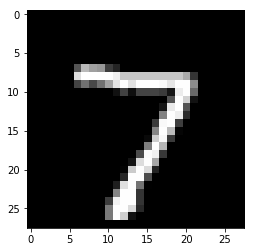

In [65]:
plt.imshow(a)
plt.gray()

In [66]:
new = autoenc.predict(x_test[0:1])

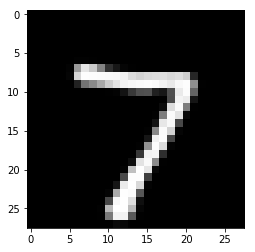

In [67]:
plt.imshow(new.reshape((28, 28)) / 255)
plt.gray()

In [68]:
from keras.applications import VGG16

In [69]:
VGG16?

In [6]:
app = VGG16(include_top=False)

In [7]:
img = Image.open('../fornit/data/images/aaadecor/BL2rXg_gYen.jpg')

In [10]:
img = np.array([np.array(img)])

In [13]:
app.predict(img).max()

179.16473

In [15]:
app.predict(img / 255.)

array([[[[0.7712316 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.6888682 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33957708, 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.19818062, 0.        , 0.02692276, ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.09795427, ..., 0.        ,
          0.12180364, 0.        ],
         [0.        , 0.        , 0.34847212, ..., 0.        ,
          0.54899925, 0.        ],
         [0.        , 0.        , 0.23030087, ..., 0.        ,
          0.21671158, 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.85681236, ..., 0.        ,
          0.41457278, 0.        ],
         [0.    

In [9]:
np.array(img) / 255.

array([[[0.11372549, 0.11764706, 0.05490196],
        [0.10196078, 0.10588235, 0.05098039],
        [0.07058824, 0.07843137, 0.02745098],
        ...,
        [0.38823529, 0.28627451, 0.28235294],
        [0.51372549, 0.41176471, 0.40784314],
        [0.50588235, 0.40392157, 0.4       ]],

       [[0.10588235, 0.10980392, 0.04705882],
        [0.0627451 , 0.06666667, 0.01176471],
        [0.11372549, 0.12156863, 0.07058824],
        ...,
        [0.83921569, 0.76078431, 0.66666667],
        [0.87843137, 0.8       , 0.70588235],
        [0.80784314, 0.72941176, 0.63529412]],

       [[0.09803922, 0.10196078, 0.03921569],
        [0.08627451, 0.09019608, 0.03529412],
        [0.12156863, 0.12941176, 0.07843137],
        ...,
        [0.64313725, 0.58039216, 0.44705882],
        [0.57647059, 0.52156863, 0.38431373],
        [0.63529412, 0.58039216, 0.44313725]],

       ...,

       [[0.05882353, 0.05098039, 0.00392157],
        [0.06666667, 0.06666667, 0.02745098],
        [0.05490196, 0